# this notebook is just for plotting figures

## Goals:
- use also processed source data to perform plotting and save plots
- do some fine tuning on the plots (font size, figsize...etc)


In [1]:
## import packages

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [2]:
## plotting setting
## create color map
my_color_map = ['#56b4e9',
                '#e69f00',
                '#009e73',
                '#f0e442',
                '#0072b2',
                '#d55e00',
                '#cc79a7']
# convert to sns plotting rgb
my_color_map = sns.color_palette(my_color_map)

# 20% lighter 
my_color_map_grey_light = ['#B3B3B3',
                      '#89E7FF',
                      '#FFB91A',
                      '#33D1A6',
                      '#FFFF75',
                      '#33A5E5',
                      '#FF9133',
                      '#FFACDA']
my_color_map_grey_light = sns.color_palette(my_color_map_grey_light)

my_color_map_grey = ['#808080',
                      '#56b4e9',
                      '#e69f00',
                      '#009e73',
                      '#f0e442',
                      '#0072b2',
                      '#d55e00',
                      '#cc79a7']
# convert to sns plotting rgb
my_color_map_grey = sns.color_palette(my_color_map_grey)

color_map_black_grey = ['#000000','#808080']
color_map_black_grey = sns.color_palette(color_map_black_grey)

## font setting
plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 8})

In [3]:
## function for loading xslx files of source data.
import os
def load_source_data(fig_number,sheet_name):
    ## change this path to where you host the source data (excel files)
    filepath = os.path.join('/Users/hunglo/Documents/inscopix_csv/source_data/',f'Fig{fig_number}.xlsx')
    df = pd.read_excel(filepath,index_col=None,sheet_name=sheet_name)
    return df

## load one dataframe for checking
df = load_source_data('S1','pump_count_slow_binge')
df


,Feeding type,pumps
0,binge,13
1,binge,10
2,binge,2
3,binge,15
4,binge,17
...,...,...
717,slow,2
718,slow,2
719,slow,1
720,slow,1


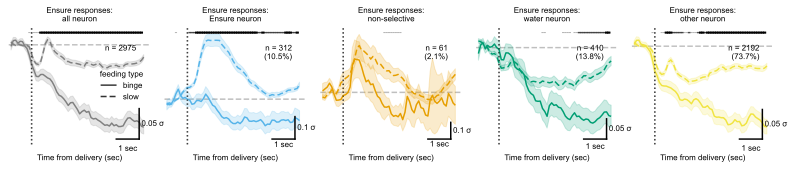

In [4]:
## Fig 1g
## aPC CaMK2 traces

df = load_source_data('1','trace_apc_camk2')
Celltype = 'apc_camk2'

def deco_sns(data, **kws):
    n = len(data['idx_cell'].unique())
    ax = plt.gca()
    ax.axvline(x=0,ls=':',color='k',alpha=0.5)
    if n == total_neuron_num:
        ax.text(.9,.85,f'n = {n}',transform=ax.transAxes,ha='right',va='top') # annotate n number, no % for all neurons
    else:
        ax.text(.9,.85,f'n = {n}\n({round(n/total_neuron_num*100,1)}%)',transform=ax.transAxes,ha='right',va='top') # annotate n number

def deco_stats(data,**kws):
    t_sign_05 = get_qvalue(data,threshold_q=0.05)
    t_sign_01 = get_qvalue(data,threshold_q=0.01)
    t_sign_001 = get_qvalue(data,threshold_q=0.001)
    ax = plt.gca()
    if Celltype =='apc_camk2':
        ymax = 0.55
    elif Celltype =='gc':
        ymax = 0.9
    elif Celltype =='s2':
        ymax = 0.85
    elif Celltype == 'apc_pv':
        ymax = 0.3
    elif Celltype == 'apc_sst':
        ymax = 0.6
    else:
        ymax = ax.get_ylim()[1]
    ymax = ax.get_ylim()[1]

    for t in t_sign_05:
        ax.plot([t-0.025,t+0.025],[ymax*0.95,ymax*0.95],color='k',alpha=0.3,lw=1)
    for t in t_sign_01:
        ax.plot([t-0.025,t+0.025],[ymax*0.95,ymax*0.95],color='k',alpha=0.6,lw=1.5)
    for t in t_sign_001:
        ax.plot([t-0.025,t+0.025],[ymax*0.95,ymax*0.95],color='k',alpha=1,lw=2)
    ax.set_xlim(xmin=-1)

def get_qvalue(data, threshold_q=0.05):
    from scipy import stats
    from statsmodels.stats.multitest import fdrcorrection
    # threshold_q=threshold_q/4 # in case we need to account for 4 clusters of neurons
    t_sign = []
    p_concat = []
    slow_data = data[data['feeding type']=='slow']
    binge_data = data[data['feeding type']=='binge']
    for t in data['Time (sec)'].unique():
        slow_value  = slow_data[slow_data['Time (sec)']==t]['zs-dff'].values
        binge_value = binge_data[binge_data['Time (sec)']==t]['zs-dff'].values
        p_val = stats.ttest_ind(slow_value, binge_value, equal_var=False)[1]
        p_concat.append(p_val)

    rejected, q_value = fdrcorrection(np.array(p_concat),method='poscorr')
    adj_p_sign_idx = q_value<threshold_q
    t_scale = np.arange(-1,4.9,0.1)
    t_sign = t_scale[adj_p_sign_idx]

    return t_sign

def deco_scale(data,**kws):
    ax = plt.gca()
    ax.axvline(x=0,ls=':',color='k',alpha=0.5,zorder=-100)
    yticks = ax.get_yticks()
    yunit = yticks[1]-yticks[0]
    yunit = round(yunit,2)
    if yunit>0.1:
        yunit=0.1
    if Celltype =='apc_camk2':
        y_bottom = -0.2
    elif Celltype =='gc':
        y_bottom = -0.2
    elif Celltype =='s2':
        y_bottom = -0.2
    elif Celltype == 'apc_pv':
        y_bottom = -0.5
    elif Celltype == 'apc_sst':
        y_bottom = -0.5
    else:
        y_bottom = ax.get_ylim()[0]
    y_bottom = ax.get_ylim()[0]
    y_top    = y_bottom+yunit
    x_offset = -0.3
    ax.plot([5+x_offset,5+x_offset],[y_bottom,y_top],c='k')
    ax.text(5.1+x_offset,y_bottom+yunit/2,f'{yunit} \u03C3',va='center',ha='left',zorder=100) # \u03C3 is sigma=sd
    ax.plot([4+x_offset,5+x_offset],[y_bottom,y_bottom],c='k')
    ax.text(4.5+x_offset,y_bottom-0.01,'1 sec',ha='center',va='top')
    # ax.set_axis_off()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.set_xlabel('Time from delivery (sec)',labelpad=10)
    sns.despine(bottom=True,left=True,ax=ax)

total_neuron_num = len(df['idx_cell'].unique()) # this variable will be used for deco_sns() later
hue_num = 5
g = sns.relplot(data=df[:],x='Time (sec)',y='zs-dff', 
                col='neuron class',col_order=['all neuron','Ensure neuron','non-selective','water neuron','other neuron'],
                hue='neuron class',hue_order=['all neuron','Ensure neuron','non-selective','water neuron','other neuron'],palette=my_color_map_grey[0:hue_num],
                style='feeding type',style_order=['binge','slow'],
                kind="line",height=2.25,aspect=1,errorbar='se',dashes=[(1,0),(4,2)],
                facet_kws={'sharey': False, 'sharex': True},legend=True)
g.map_dataframe(deco_sns)

g.refline(y=0,color='grey',alpha=0.5,zorder=-100)
g.map_dataframe(deco_stats)
g.map_dataframe(deco_scale)
g.set_titles('Ensure responses:\n{col_name}')
g.fig.subplots_adjust(wspace=.1)

## remove legend and replot inside the first panel
g._legend.remove()
h,l = g.fig.get_axes()[0].get_legend_handles_labels()
g.fig.get_axes()[0].legend(h[7:],l[7:],loc=5,frameon=False,title='feeding type') 



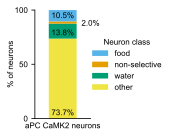

In [5]:
## Fig 1d bargraph

num_milk_neuron      = len(df[df['neuron class']=='Ensure neuron']['idx_cell'].unique())
num_water_neuron     = len(df[df['neuron class']=='water neuron']['idx_cell'].unique())
num_nonselect_neuron = len(df[df['neuron class']=='non-selective']['idx_cell'].unique())
num_other_neuron     = len(df[df['neuron class']=='other neuron']['idx_cell'].unique())

labels = 'food neurons', 'Both', 'Water neurons', 'not responding'
sizes = [num_milk_neuron,
         num_nonselect_neuron,        
         num_water_neuron,
         num_other_neuron]
sizes /= np.sum(sizes)
sizes = sizes*100 # make 100%

cell_num_list_T = pd.DataFrame(sizes[::-1]).T
cell_num_list_T.rename({3: 'food', 2: 'non-selective', 1:'water',0:'other'}, axis=1, inplace=True)

fig1, ax1 = plt.subplots(figsize=[1,2])
cell_num_list_T.plot(kind='bar',stacked=True,color=my_color_map[3::-1],ax=ax1)
ax1.set_xlabel('aPC CaMK2 neurons')
ax1.set_xticks([])
ax1.legend()  # reverse both handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
for idx,x in enumerate(cell_num_list_T.iloc[0,:]):
  steps = [0, *cell_num_list_T.iloc[0,:].values.cumsum()]
  text = f'{round(x,2):.1f}'
  if idx==2:
    ax1.text(0.5,steps[idx],text+'%',ha='center',va='center')
  else: 
    ax1.text(0,steps[idx]+5,text+'%',ha='center',va='center')
    
order = [3,2,1,0]
ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='upper left',bbox_to_anchor=(0.9, 0.8), frameon=False,title='Neuron class',fontsize=8)
plt.ylabel('% of neurons',labelpad=0)
plt.yticks([0,50,100])
plt.ylim([0,100])
sns.despine()

plot_name = '1_neuron_types_bargraph_all'


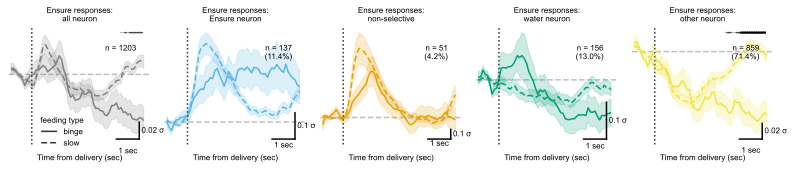

In [6]:
## Fig 2d GC traces
df = load_source_data('2','trace_gc')
Celltype = 'gc'


def deco_sns(data, **kws):
    n = len(data['idx_cell'].unique())
    ax = plt.gca()
    ax.axvline(x=0,ls=':',color='k',alpha=0.5)
    if n == total_neuron_num:
        ax.text(.9,.85,f'n = {n}',transform=ax.transAxes,ha='right',va='top') # annotate n number, no % for all neurons
    else:
        ax.text(.9,.85,f'n = {n}\n({round(n/total_neuron_num*100,1)}%)',transform=ax.transAxes,ha='right',va='top') # annotate n number

def deco_stats(data,**kws):
    t_sign_05 = get_qvalue(data,threshold_q=0.05)
    t_sign_01 = get_qvalue(data,threshold_q=0.01)
    t_sign_001 = get_qvalue(data,threshold_q=0.001)
    ax = plt.gca()
    if Celltype =='apc_camk2':
        ymax = 0.55
    elif Celltype =='gc':
        ymax = 0.9
    elif Celltype =='s2':
        ymax = 0.85
    elif Celltype == 'apc_pv':
        ymax = 0.3
    elif Celltype == 'apc_sst':
        ymax = 0.6
    else:
        ymax = ax.get_ylim()[1]
    ymax = ax.get_ylim()[1]

    for t in t_sign_05:
        ax.plot([t-0.025,t+0.025],[ymax*0.95,ymax*0.95],color='k',alpha=0.3,lw=1)
    for t in t_sign_01:
        ax.plot([t-0.025,t+0.025],[ymax*0.95,ymax*0.95],color='k',alpha=0.6,lw=1.5)
    for t in t_sign_001:
        ax.plot([t-0.025,t+0.025],[ymax*0.95,ymax*0.95],color='k',alpha=1,lw=2)
    ax.set_xlim(xmin=-1)

def get_qvalue(data, threshold_q=0.05):
    from scipy import stats
    from statsmodels.stats.multitest import fdrcorrection
    # threshold_q=threshold_q/4 # in case we need to account for 4 clusters of neurons
    t_sign = []
    p_concat = []
    slow_data = data[data['feeding type']=='slow']
    binge_data = data[data['feeding type']=='binge']
    for t in data['Time (sec)'].unique():
        slow_value  = slow_data[slow_data['Time (sec)']==t]['zs-dff'].values
        binge_value = binge_data[binge_data['Time (sec)']==t]['zs-dff'].values
        p_val = stats.ttest_ind(slow_value, binge_value, equal_var=False)[1]
        p_concat.append(p_val)

    rejected, q_value = fdrcorrection(np.array(p_concat),method='poscorr')
    adj_p_sign_idx = q_value<threshold_q
    t_scale = np.arange(-1,4.9,0.1)
    t_sign = t_scale[adj_p_sign_idx]

    return t_sign

def deco_scale(data,**kws):
    ax = plt.gca()
    ax.axvline(x=0,ls=':',color='k',alpha=0.5,zorder=-100)
    yticks = ax.get_yticks()
    yunit = yticks[1]-yticks[0]
    yunit = round(yunit,2)
    if yunit>0.1:
        yunit=0.1
    if Celltype =='apc_camk2':
        y_bottom = -0.2
    elif Celltype =='gc':
        y_bottom = -0.2
    elif Celltype =='s2':
        y_bottom = -0.2
    elif Celltype == 'apc_pv':
        y_bottom = -0.5
    elif Celltype == 'apc_sst':
        y_bottom = -0.5
    else:
        y_bottom = ax.get_ylim()[0]
    y_bottom = ax.get_ylim()[0]
    y_top    = y_bottom+yunit
    x_offset = -0.3
    ax.plot([5+x_offset,5+x_offset],[y_bottom,y_top],c='k')
    ax.text(5.1+x_offset,y_bottom+yunit/2,f'{yunit} \u03C3',va='center',ha='left',zorder=100) # \u03C3 is sigma=sd
    ax.plot([4+x_offset,5+x_offset],[y_bottom,y_bottom],c='k')
    ax.text(4.5+x_offset,y_bottom-0.01,'1 sec',ha='center',va='top')
    # ax.set_axis_off()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.set_xlabel('Time from delivery (sec)',labelpad=10)
    sns.despine(bottom=True,left=True,ax=ax)

total_neuron_num = len(df['idx_cell'].unique()) # this variable will be used for deco_sns() later
hue_num = 5
g = sns.relplot(data=df[:],x='Time (sec)',y='zs-dff', 
                col='neuron class',col_order=['all neuron','Ensure neuron','non-selective','water neuron','other neuron'],
                hue='neuron class',hue_order=['all neuron','Ensure neuron','non-selective','water neuron','other neuron'],palette=my_color_map_grey[0:hue_num],
                style='feeding type',style_order=['binge','slow'],
                kind="line",height=2.25,aspect=1,errorbar='se',dashes=[(1,0),(4,2)],
                facet_kws={'sharey': False, 'sharex': True},legend=True)
g.map_dataframe(deco_sns)

g.refline(y=0,color='grey',alpha=0.5,zorder=-100)
g.map_dataframe(deco_stats)
g.map_dataframe(deco_scale)
g.set_titles('Ensure responses:\n{col_name}')
g.fig.subplots_adjust(wspace=.1)

## remove legend and replot inside the first panel
g._legend.remove()
h,l = g.fig.get_axes()[0].get_legend_handles_labels()
g.fig.get_axes()[0].legend(h[7:],l[7:],loc=[0.2,-0.05],frameon=False,title='feeding type') 



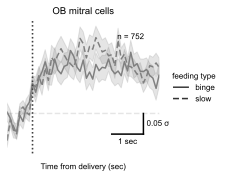

In [7]:
## Fig 3d OB traces
df = load_source_data('3','trace_ob')

def deco_sns(data, **kws):
    n = len(data['index'].unique())
    ax = plt.gca()
    ax.axvline(x=0,ls=':',color='k',alpha=0.5)
    # if n == total_neuron_num:
    ax.text(.9,.9,f'n = {n}',transform=ax.transAxes,ha='right',va='top') # annotate n number, no % for all neurons
    # else:
        # ax.text(.9,.85,f'n = {n}\n({round(n/total_neuron_num*100,1)}%)',transform=ax.transAxes,ha='right',va='top') # annotate n number

def deco_stats(data,**kws):
    t_sign_05 = get_qvalue(data,threshold_q=0.05)
    t_sign_01 = get_qvalue(data,threshold_q=0.01)
    t_sign_001 = get_qvalue(data,threshold_q=0.001)
    ax = plt.gca()
    ymax = ax.get_ylim()[1]
    for t in t_sign_05:
        ax.plot([t-0.025,t+0.025],[ymax*0.95,ymax*0.95],color='k',alpha=0.3,lw=1)
    for t in t_sign_01:
        ax.plot([t-0.025,t+0.025],[ymax*0.95,ymax*0.95],color='k',alpha=0.6,lw=1.5)
    for t in t_sign_001:
        ax.plot([t-0.025,t+0.025],[ymax*0.95,ymax*0.95],color='k',alpha=1,lw=2)
    ax.set_xlim(xmin=-1)

def get_qvalue(data, threshold_q=0.05):
    from scipy import stats
    from statsmodels.stats.multitest import fdrcorrection
    # threshold_q=threshold_q/4 # in case we need to account for 4 clusters of neurons
    t_sign = []
    p_concat = []
    slow_data = data[data['feeding type']=='slow']
    binge_data = data[data['feeding type']=='binge']
    for t in data['Time (sec)'].unique():
        slow_value  = slow_data[slow_data['Time (sec)']==t]['dff'].values
        binge_value = binge_data[binge_data['Time (sec)']==t]['dff'].values
        p_val = stats.ttest_ind(slow_value, binge_value, equal_var=False)[1]
        p_concat.append(p_val)
    rejected, q_value = fdrcorrection(np.array(p_concat),method='poscorr')
    adj_p_sign_idx = q_value<threshold_q
    t_scale = np.arange(-1,4,0.1)
    # t_scale = np.arange(-5,5,0.1)
    t_sign = t_scale[adj_p_sign_idx]

    return t_sign

def deco_scale(data,**kws):
    ax = plt.gca()
    yticks = ax.get_yticks()
    yunit = yticks[1]-yticks[0]
    yunit = round(yunit,2)
    # if yunit>0.1:
    #     yunit=0.1
    # # if yunit >0.1:
    # #     yunit=0.1 # shrink it?
    # ylims = ax.get_ylim()
    x_offset = 0.5
    y_bottom,y_top = yticks[1], yticks[1]+yunit
    # y_bottom,y_top = ylims[0], ylims[0]+yunit
    ax.plot([4-x_offset,4-x_offset],[y_bottom,y_top],c='k')
    ax.text(4.1-x_offset,y_bottom+yunit/2,f'{yunit} \u03C3',va='center',ha='left') # \u03C3 is sigma=sd
    ax.plot([3-x_offset,4-x_offset],[y_bottom,y_bottom],c='k')
    ax.text(3.5-x_offset,y_bottom-0.01,'1 sec',ha='center',va='top')
    # ax.set_axis_off()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.set_xlabel('Time from milk delivery (sec)',labelpad=10)
    sns.despine(bottom=True,left=True,ax=ax)


g = sns.relplot(data=df,x='Time (sec)',y='dff',kind='line',
                style='feeding type',style_order = ['binge','slow'], color=my_color_map_grey[0],
                height=2.5,aspect=1,errorbar='se',dashes=[(1,0),(4,2)],facet_kws=dict(legend_out=False)).set(title='OB mitral cells')

g.map_dataframe(deco_sns)
g.map_dataframe(deco_stats)
g.map_dataframe(deco_scale)
g.set_xlabels('Time from delivery (sec)')
plt.xlim([-0.8,4])
g.refline(x=0,ls=':',color='k',alpha=0.5,zorder=-100)
g.refline(y=0,color='grey',alpha=0.2,zorder=-100)
sns.move_legend(g,frameon=False,loc=(0,0),bbox_to_anchor=(0.95, 0.4))


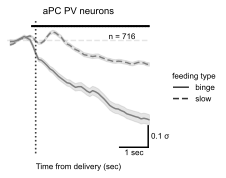

In [8]:
## Fig 3h aPC PV cells
df = load_source_data('3','trace_apc_pv')

def deco_sns(data, **kws):
    n = len(data['idx_cell'].unique())
    ax = plt.gca()
    ax.axvline(x=0,ls=':',color='k',alpha=0.5)
    # if n == total_neuron_num:
    ax.text(.9,.9,f'n = {n}',transform=ax.transAxes,ha='right',va='top') # annotate n number, no % for all neurons
    # else:
        # ax.text(.9,.85,f'n = {n}\n({round(n/total_neuron_num*100,1)}%)',transform=ax.transAxes,ha='right',va='top') # annotate n number

def deco_stats(data,**kws):
    t_sign_05 = get_qvalue(data,threshold_q=0.05)
    t_sign_01 = get_qvalue(data,threshold_q=0.01)
    t_sign_001 = get_qvalue(data,threshold_q=0.001)
    ax = plt.gca()
    ymax = ax.get_ylim()[1]
    for t in t_sign_05:
        ax.plot([t-0.025,t+0.025],[ymax*0.95,ymax*0.95],color='k',alpha=0.3,lw=1)
    for t in t_sign_01:
        ax.plot([t-0.025,t+0.025],[ymax*0.95,ymax*0.95],color='k',alpha=0.6,lw=1.5)
    for t in t_sign_001:
        ax.plot([t-0.025,t+0.025],[ymax*0.95,ymax*0.95],color='k',alpha=1,lw=2)
    ax.set_xlim(xmin=-1)

def get_qvalue(data, threshold_q=0.05):
    from scipy import stats
    from statsmodels.stats.multitest import fdrcorrection
    # threshold_q=threshold_q/4 # in case we need to account for 4 clusters of neurons
    t_sign = []
    p_concat = []
    slow_data = data[data['feeding type']=='slow']
    binge_data = data[data['feeding type']=='binge']
    for t in data['Time (sec)'].unique():
        slow_value  = slow_data[slow_data['Time (sec)']==t]['zs-dff'].values
        binge_value = binge_data[binge_data['Time (sec)']==t]['zs-dff'].values
        p_val = stats.ttest_ind(slow_value, binge_value, equal_var=False)[1]
        p_concat.append(p_val)
    rejected, q_value = fdrcorrection(np.array(p_concat),method='poscorr')
    adj_p_sign_idx = q_value<threshold_q
    t_scale = np.arange(-0.9,4.1,0.1)
    # t_scale = np.arange(-5,5,0.1)
    t_sign = t_scale[adj_p_sign_idx]

    return t_sign

def deco_scale(data,**kws):
    ax = plt.gca()
    yticks = ax.get_yticks()
    yunit = yticks[1]-yticks[0]
    yunit = round(yunit,2)
    # if yunit>0.1:
    #     yunit=0.1
    # # if yunit >0.1:
    # #     yunit=0.1 # shrink it?
    # ylims = ax.get_ylim()
    x_offset = 0.05
    y_bottom,y_top = yticks[0], yticks[0]+yunit
    # y_bottom,y_top = ylims[0], ylims[0]+yunit
    ax.plot([4-x_offset,4-x_offset],[y_bottom,y_top],c='k')
    ax.text(4.1-x_offset,y_bottom+yunit/2,f'{yunit} \u03C3',va='center',ha='left') # \u03C3 is sigma=sd
    ax.plot([3-x_offset,4-x_offset],[y_bottom,y_bottom],c='k')
    ax.text(3.5-x_offset,y_bottom-0.01,'1 sec',ha='center',va='top')
    # ax.set_axis_off()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.set_xlabel('Time from milk delivery (sec)',labelpad=10)
    sns.despine(bottom=True,left=True,ax=ax)


g = sns.relplot(data=df,x='Time (sec)',y='zs-dff',kind='line',
                style='feeding type',style_order = ['binge','slow'], color=my_color_map_grey[0],
                height=2.5,aspect=1,errorbar='se',dashes=[(1,0),(4,2)],facet_kws=dict(legend_out=False)).set(title=f'aPC PV neurons')

g.map_dataframe(deco_sns)
g.map_dataframe(deco_stats)
g.map_dataframe(deco_scale)
g.set_xlabels('Time from delivery (sec)')
plt.xlim([-1,4])
g.refline(x=0,ls=':',color='k',alpha=0.5,zorder=-100)
g.refline(y=0,color='grey',alpha=0.2,zorder=-100)
sns.move_legend(g,frameon=False,loc=(0,0),bbox_to_anchor=(0.95, 0.4))


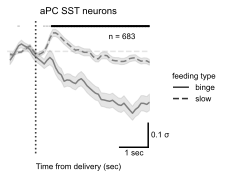

In [9]:
## Fig 3l aPC SST cells
df = load_source_data('3','trace_apc_sst')


def deco_sns(data, **kws):
    n = len(data['idx_cell'].unique())
    ax = plt.gca()
    ax.axvline(x=0,ls=':',color='k',alpha=0.5)
    # if n == total_neuron_num:
    ax.text(.9,.9,f'n = {n}',transform=ax.transAxes,ha='right',va='top') # annotate n number, no % for all neurons
    # else:
        # ax.text(.9,.85,f'n = {n}\n({round(n/total_neuron_num*100,1)}%)',transform=ax.transAxes,ha='right',va='top') # annotate n number

def deco_stats(data,**kws):
    t_sign_05 = get_qvalue(data,threshold_q=0.05)
    t_sign_01 = get_qvalue(data,threshold_q=0.01)
    t_sign_001 = get_qvalue(data,threshold_q=0.001)
    ax = plt.gca()
    ymax = ax.get_ylim()[1]
    for t in t_sign_05:
        ax.plot([t-0.025,t+0.025],[ymax*0.95,ymax*0.95],color='k',alpha=0.3,lw=1)
    for t in t_sign_01:
        ax.plot([t-0.025,t+0.025],[ymax*0.95,ymax*0.95],color='k',alpha=0.6,lw=1.5)
    for t in t_sign_001:
        ax.plot([t-0.025,t+0.025],[ymax*0.95,ymax*0.95],color='k',alpha=1,lw=2)
    ax.set_xlim(xmin=-1)

def get_qvalue(data, threshold_q=0.05):
    from scipy import stats
    from statsmodels.stats.multitest import fdrcorrection
    # threshold_q=threshold_q/4 # in case we need to account for 4 clusters of neurons
    t_sign = []
    p_concat = []
    slow_data = data[data['feeding type']=='slow']
    binge_data = data[data['feeding type']=='binge']
    for t in data['Time (sec)'].unique():
        slow_value  = slow_data[slow_data['Time (sec)']==t]['zs-dff'].values
        binge_value = binge_data[binge_data['Time (sec)']==t]['zs-dff'].values
        p_val = stats.ttest_ind(slow_value, binge_value, equal_var=False)[1]
        p_concat.append(p_val)
    rejected, q_value = fdrcorrection(np.array(p_concat),method='poscorr')
    adj_p_sign_idx = q_value<threshold_q
    t_scale = np.arange(-0.9,4.1,0.1)
    # t_scale = np.arange(-5,5,0.1)
    t_sign = t_scale[adj_p_sign_idx]

    return t_sign

def deco_scale(data,**kws):
    ax = plt.gca()
    yticks = ax.get_yticks()
    yunit = yticks[1]-yticks[0]
    yunit = round(yunit,2)
    # if yunit>0.1:
    #     yunit=0.1
    # # if yunit >0.1:
    # #     yunit=0.1 # shrink it?
    # ylims = ax.get_ylim()
    x_offset = 0.05
    y_bottom,y_top = yticks[0], yticks[0]+yunit
    # y_bottom,y_top = ylims[0], ylims[0]+yunit
    ax.plot([4-x_offset,4-x_offset],[y_bottom,y_top],c='k')
    ax.text(4.1-x_offset,y_bottom+yunit/2,f'{yunit} \u03C3',va='center',ha='left') # \u03C3 is sigma=sd
    ax.plot([3-x_offset,4-x_offset],[y_bottom,y_bottom],c='k')
    ax.text(3.5-x_offset,y_bottom-0.01,'1 sec',ha='center',va='top')
    # ax.set_axis_off()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.set_xlabel('Time from milk delivery (sec)',labelpad=10)
    sns.despine(bottom=True,left=True,ax=ax)


g = sns.relplot(data=df,x='Time (sec)',y='zs-dff',kind='line',
                style='feeding type',style_order = ['binge','slow'], color=my_color_map_grey[0],
                height=2.5,aspect=1,errorbar='se',dashes=[(1,0),(4,2)],facet_kws=dict(legend_out=False)).set(title=f'aPC SST neurons')

g.map_dataframe(deco_sns)
g.map_dataframe(deco_stats)
g.map_dataframe(deco_scale)
g.set_xlabels('Time from delivery (sec)')
plt.xlim([-1,4])
g.refline(x=0,ls=':',color='k',alpha=0.5,zorder=-100)
g.refline(y=0,color='grey',alpha=0.2,zorder=-100)
sns.move_legend(g,frameon=False,loc=(0,0),bbox_to_anchor=(0.95, 0.4))



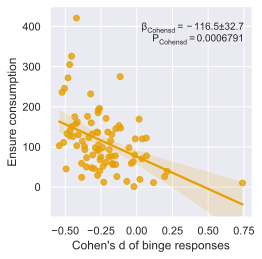

In [10]:
## Fig 4 b only binge feeding part
## Correlation plot (no clustering shading)

df = pd.read_csv('/Users/hunglo/Documents/inscopix_csv/source_data/fig4_slow_binge_cohensd_window_all.csv')

data = df.copy()

cell_list = ['apc_camk2']
feeding_type = ['binge']

data = data[data['window_size'].isin(['0_4'])]
data = data[data['feeding_type'].isin(feeding_type)]
data = data[data['Celltype'].isin(cell_list)]
data = data[data['anosmic'].isin([False])]
data = data[data['fasted'].isin([False])]

sns.set()
sns.lmplot(data=data,x='cohens_d',y='milk_consumption',hue='Celltype',height=3.75,aspect=1,palette=my_color_map[1:],legend=False)
plt.ylim(ymin=-75)
plt.ylabel('Ensure consumption')
plt.xlabel("Cohen's d of binge responses")

## Estimation stats are copied from R: linear mixed model
Est = '-116.462 ± 32.730'
p_mix = 0.0006791

n = len(data)

params = {'mathtext.default': 'regular' }   
plt.rcParams.update(params)

plt.text(x=0.75,y=410,s="$\u03B2_{Cohens d}=-116.5 ± 32.7$\n$P_{Cohens d}=0.0006791$",ha='right',va='top',fontsize=10)

plt.tight_layout()



-5.140378686166757 0.000323044677564837


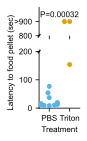

In [11]:
## Fig 4e
## Buried food test

## reset the style here
mpl.rc_file_defaults()
plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 8})


df = load_source_data('4','Buried_food_test')

fig, axes = plt.subplots(figsize = [1.7,2],nrows=2,sharex=True,gridspec_kw={'height_ratios':[1,2]})
sns.swarmplot(data=df,x='Treatment',y='Latency (sec)',hue='Treatment',ax=axes[0],palette=my_color_map,legend=False)
sns.swarmplot(data=df,x='Treatment',y='Latency (sec)',hue='Treatment',ax=axes[1],palette=my_color_map,legend=False)

axes[1].set_ylim(ymin=0,ymax=200)
axes[0].set_ylim(ymin=800,ymax=1000)
axes[0].set_ylabel('')
axes[0].set_yticks([800,900,])
axes[0].set_yticklabels(['800','>900'])
sns.despine(ax=axes[0],bottom=True)
sns.despine(ax=axes[1])
axes[1].set_ylabel('Latency to food pellet (sec)')
axes[1].yaxis.set_label_coords(-0.6,0.8)

ax = axes[0]
d = .02
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d*2, +d*2), **kwargs)        # top-left diagonal
# ax.set_xticks('')

ax2 = axes[1]
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal

#remove one of the legend
# axes[1].legend_.remove()
# plt.show()
axes[0].set_xlim([-0.5,1.5])


t,p = stats.ttest_ind(df[df['Treatment']=='PBS']['Latency (sec)'],df[df['Treatment']=='Triton']['Latency (sec)'])
print(t,p)
axes[0].text(x=0.5,y=920,s=f'P={p:.2g}',ha='center',va='bottom')
plt.tight_layout()


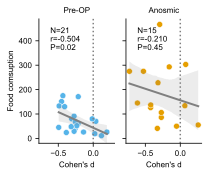

In [12]:
## Fig 4f
## scatter plots anosmic

df = load_source_data('4','Anosmia_scatterplot')

cell_list = ['apc_camk2']
title_list = ['aPC CaMK2']

def annotate_anosmic(data, **kws):
    data_normal = data[data['anosmic']=='Pre-OP']
    r, p = sp.stats.pearsonr(data_normal['cohens_d'], data_normal['milk_consumption'])
    n = len(data_normal)
    ax = plt.gca()
    if p < 0.001:
        ax.text(.9, .8, f'Pre-OP N={n}\nr={r:.3f}\nP<0.001',ha='right', transform=ax.transAxes)
    else:
        ax.text(.9, .8, f'Pre-OP N={n}\nr={r:.3f}\nP={p:.2g}',ha='right', transform=ax.transAxes)
    sns.regplot(data=data_normal,x='cohens_d',y='milk_consumption',ax=ax,scatter=False,color=my_color_map[0],line_kws={"linewidth":2})

    data_anosmic = data[data['anosmic']=='Anosmic']
    r, p = sp.stats.pearsonr(data_anosmic['cohens_d'], data_anosmic['milk_consumption'])
    n = len(data_anosmic)
    ax = plt.gca()
    if p < 0.001:
        ax.text(.9, .6, f'Anosmic N={n}\nr={r:.3f}\nP<0.001',ha='right', transform=ax.transAxes)
    else:
        ax.text(.9, .6, f'Anosmic N={n}\nr={r:.3f}\nP={p:.2g}',ha='right', transform=ax.transAxes)
    sns.regplot(data=data_anosmic,x='cohens_d',y='milk_consumption',ax=ax,scatter=False,color=my_color_map[1],line_kws={"linewidth":2})
def annotate(data, **kws):
    import scipy as sp
    r, p = sp.stats.pearsonr(data['cohens_d'], data['milk_consumption'])
    n = len(data)
    ax = plt.gca()
    if p < 0.001:
        ax.text(.15, .75, f'N={n}\nr={r:.3f}\nP<0.001',ha='left', transform=ax.transAxes)
    else:
        ax.text(.15, .75, f'N={n}\nr={r:.3f}\nP={p:.2g}',ha='left', transform=ax.transAxes)
    ax.set_ylim(ymin=-20)
    sns.regplot(data=data,x='cohens_d',y='milk_consumption',ax=ax,scatter=False,color='grey',line_kws={"linewidth":2})

g = sns.FacetGrid(data=df, sharex=True, sharey=True,palette=my_color_map,height=2.25,aspect=0.65,margin_titles=True,col='anosmic',gridspec_kws={'wspace':0.15})
g.map_dataframe(sns.scatterplot, x='cohens_d',y='milk_consumption',hue='anosmic',hue_order=['Pre-OP','Anosmic'],palette=my_color_map)
global_xmin = df['cohens_d'].min()

g.map_dataframe(annotate)
g.refline(x=0,ls=':',color='grey')

g.set_titles(col_template="{col_name}")

g.set_ylabels('Food comsuption')
g.set_xlabels(r"Cohen's d")

plt.tight_layout()


Ttest_indResult(statistic=0.49904460491871644, pvalue=0.6209617193931751)


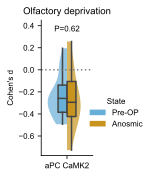

In [13]:
## Fig 4g
## Anosmic cohen's d distribution

df = load_source_data('4',sheet_name='Anosmic_cohensd_distribution')

data = df.copy()

cell_list = ['apc_camk2']
title_list = ['aPC CaMK2']

pvals = []
preop_values   = data[data['anosmic']=='Pre-OP']['cohens_d'].values
anosmic_values = data[data['anosmic']=='Anosmic']['cohens_d'].values

print(stats.ttest_ind(preop_values,anosmic_values))
pvals.append(stats.ttest_ind(preop_values,anosmic_values)[1])

# Celltype_list = ['aPC CaMK2' if Celltype=='aPC CaMK2' else 'GC' for Celltype in data['Celltype']]
# data['Celltype'] = Celltype_list

flierprops = dict(marker='.',markeredgecolor='k',markersize=2,linestyle='none',alpha=1)

## plotting
fig, ax = plt.subplots(figsize=[2,2.5])

sns.violinplot(data = data, x='Celltype', y='cohens_d',hue='anosmic',cut=0,
                col_order=cell_list,split=True,inner=None, linewidth=0,
                width=0.75,palette=my_color_map[0:2],ax=ax)

# sns.swarmplot(data = data, x='Celltype', y='cohens_d',hue='anosmic')

## change alpha for violins
for violin, alpha in zip(ax.collections[:], np.ones(len(ax.collections[:]))*0.7):
    violin.set_alpha(alpha)

sns.boxplot(data = data, x='Celltype', y='cohens_d',hue='anosmic',
                width=0.35,showcaps=False, flierprops=flierprops,boxprops={'zorder': 2},dodge=True,
                palette=my_color_map[0:2],ax=ax)
ax.text(0,0.4,f"P={pvals[0]:.2g}",ha='center',va='top')

ax.set_ylim(ymax=0.45)

ax.axhline(y=0,ls=':',color='grey')
sns.despine(ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title='State',frameon=False, loc='lower left', bbox_to_anchor=(0.8, 0.15))
ax.set_xlim([-0.5,0.5])
ax.set_ylabel("Cohen's d")
ax.set_xlabel("")
ax.set_title('Olfactory deprivation')

plt.tight_layout()


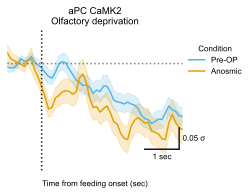

In [14]:
## Fig 4h
## Ca2+ trace of Pre-OP and anosmic

data_long_normal  = load_source_data('4','trace_normal')
data_long_anosmic = load_source_data('4','trace_anosmic')


fig, axes = plt.subplots(ncols=1,sharey=True,sharex=True,figsize=[3,2.75])

sns.lineplot(data=data_long_normal,x='Time (sec)',y='zs-dff', color=my_color_map_grey[1],errorbar='se',ax=axes,label='Pre-OP',legend=False)
sns.lineplot(data=data_long_anosmic,x='Time (sec)',y='zs-dff', color=my_color_map_grey[2],errorbar='se',ax=axes,label='Anosmic',legend=False)



handles, labels = axes.get_legend_handles_labels()
# axes.legend(labels=['Pre-OP','Anosmic'],loc="upper left", bbox_to_anchor=(1, 1),frameon=False,title=f"Condition")

fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(0.85, 0.8),frameon=False,title='Condition')
# sns.move_legend(fig,"upper left", bbox_to_anchor=(1, 1),frameon=False,title=f"Condition")

sns.despine(left=True,bottom=True,ax=axes)

# hline value
hline_y = data_long_normal[(data_long_normal['Time (sec)']>=-1) & (data_long_normal['Time (sec)']<=0)]['zs-dff'].mean()

axes.get_yaxis().set_visible(False)
axes.get_xaxis().set_ticks([])
axes.set_xlabel('Time from feeding onset (sec)',labelpad=10)
axes.axhline(y=hline_y,ls=':',c='grey')
axes.set_xlim([-1,4.1])
axes.axvline(x=0,ls=':',c='k')

yticks = axes.get_yticks()
yunit = yticks[1]-yticks[0]
yunit = round(yunit,3)
ylims = axes.get_ylim()
y_offset = 0.05
y_bottom,y_top = ylims[0]+y_offset, ylims[0]+yunit+y_offset
axes.plot([4,4],[y_bottom,y_top],c='k')
axes.text(4.1,y_bottom+yunit/2,f'{yunit} \u03C3',va='center',ha='left') # \u03C3 is sigma=sd
axes.plot([3,4],[y_bottom,y_bottom],c='k')
axes.text(3.5,y_bottom-0.01,'1 sec',ha='center',va='top')

axes.set_title('aPC CaMK2\nOlfactory deprivation')

plt.tight_layout()


In [15]:
## Fig 4l 
## Traces of aPC CaMK2 and GC upon fasting

## unfortunate the excel can't storage anything more than this size: Max sheet size is: 1048576, 16384
## so we will need to skip this now



-4.041159928317131 5.8911362087873396e-05


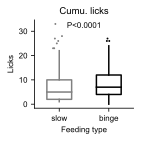

In [16]:
## Figure S1
## lick events

df = load_source_data('S1','lick_count_slow_binge')
df

plt.figure(figsize=[2,2])

flierprops = dict(marker='.',markeredgecolor='k',markersize=2,linestyle='none',alpha=1)
medianprops = dict(color="white")
boxprops= dict(edgecolor="white")
whiskerprops = dict(color="k")

ax=sns.boxplot(data=df,y='licks',x='Feeding type',width=0.5,palette=color_map_black_grey[::-1],order=['slow','binge'],
               flierprops=flierprops, showcaps=False, medianprops = medianprops, boxprops=boxprops,whiskerprops=whiskerprops)
plt.title(f'Cumu. licks')
sns.despine()
plt.tight_layout()

# jitter outliners
for artist in ax.lines:
    if artist.get_linestyle() == "None":
        pos = artist.get_xdata()
        artist.set_xdata(pos + np.random.uniform(-.125, .125, len(pos)))

## now change all lines & fliers to black and grey
box_patches = [patch for patch in ax.patches if type(patch) == mpl.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')
    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers

plt.ylabel('Licks')

from scipy import stats
lick_slow  = df[df['Feeding type']=='slow']['licks'].values
lick_binge = df[df['Feeding type']=='binge']['licks'].values
t,pval = stats.ttest_ind(lick_slow,lick_binge)
if pval <0.0001:
    ax.text(x=0.5,y=0.91,s=f'P<0.0001',ha='center',transform=ax.transAxes)
else:
    ax.text(x=0.5,y=0.91,s=f'P={pval:.2e}',ha='center',transform=ax.transAxes)

print(t,pval)


-46.30758974491734 4.403053672854631e-218


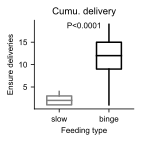

In [17]:
## Figure S1
## pump events

df = load_source_data('S1','pump_count_slow_binge')
df

plt.figure(figsize=[2,2])
# sns.violinplot(data=lick_count_df,y='licks',x='feeding type',width=0.5,palette=my_color_map)
flierprops = dict(marker='.',markeredgecolor='k',markersize=2,linestyle='none',alpha=1)
medianprops = dict(color="white")
boxprops= dict(edgecolor="white")
whiskerprops = dict(color="k")

ax=sns.boxplot(data=df,y='pumps',x='Feeding type',width=0.5,palette=color_map_black_grey[::-1],order=['slow','binge'],
               flierprops=flierprops, showcaps=False, medianprops = medianprops, boxprops=boxprops,whiskerprops=whiskerprops)
plt.title(f'Cumu. delivery')
sns.despine()
# plt.yticks([0,5,10,15,20])
# plt.ylim(ymax=22)
plt.tight_layout()

# jitter outliners
for artist in ax.lines:
    if artist.get_linestyle() == "None":
        pos = artist.get_xdata()
        artist.set_xdata(pos + np.random.uniform(-.125, .125, len(pos)))

## now change all lines & fliers to black and grey
box_patches = [patch for patch in ax.patches if type(patch) == mpl.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')
    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers

plt.ylabel('Ensure deliveries')

from scipy import stats

pump_slow  = df[df['Feeding type']=='slow']['pumps'].values
pump_binge = df[df['Feeding type']=='binge']['pumps'].values

t,pval = stats.ttest_ind(pump_slow, pump_binge)
if pval <0.0001:
    ax.text(x=0.5,y=0.91,s=f'P<0.0001',ha='center',transform=ax.transAxes)
else:
    ax.text(x=0.5,y=0.91,s=f'P={pval:.2e}',ha='center',transform=ax.transAxes)
print(t,pval)


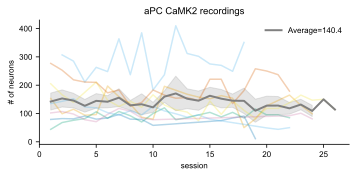

In [18]:
## Fig S3d
## neuron number across sessions

df = load_source_data('S3','neuron_number_across_session')

df['session'] = df['session'].astype(int)

plt.figure(figsize=[5,2.5])
for idx,mouse_id in enumerate(df['mouse_id'].unique()):
    # print(mouse_id)
    session_mask = np.isfinite(df[df['mouse_id']==mouse_id]['neuron number'].values)
    plt.plot(df[df['mouse_id']==mouse_id]['session'].values[session_mask],df[df['mouse_id']==mouse_id]['neuron number'][session_mask],alpha=0.3,color=my_color_map[idx%7])

sns.lineplot(data = df, x='session',y='neuron number',color='Grey',errorbar='se',lw=2,zorder=100,label=f'Average={df["neuron number"].mean():.5g}')
plt.legend(frameon=False)
# sns.lineplot(date = df, x='session',y='neuron number', hue='mouse_id',lw=1)

plt.ylabel('# of neurons')
plt.xlim(xmin=0)
sns.despine()
plt.title('aPC CaMK2 recordings')
plt.tight_layout()


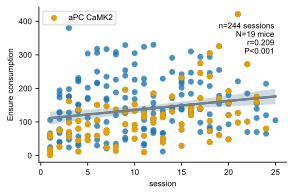

In [19]:
## Fig S9a
## session vs Ensure consumption

df = load_source_data('4','cohensd_all_mice')

import scipy as sp
def annotate_session(data, **kws):
    r, p = sp.stats.pearsonr(data['session'], data['milk_consumption'])
    n = len(data)
    ax = plt.gca()
    sns.regplot(data=data,x='session',y='milk_consumption',ax=ax,scatter=False,color='grey',line_kws={"linewidth":2})
    if p < 0.001:
        ax.text(.95, .7, f'n={n} sessions\nN={N_mice} mice\nr={r:.3f}\nP<0.001',ha='right',
                transform=ax.transAxes)
    else:
        ax.text(.95, .7, f'n={n} sessions\nN={N_mice} mice\nr={r:.3f}\nP={p:2g}',ha='right',
                transform=ax.transAxes)
    ylims = ax.get_ylim()

data = df[(df['fasted'] == False) & (df['anosmic']==False)]
data = data[data['feeding_type']=='binge']
data['session'] = data['session'].astype(int)

N_mice = len(data['mouse_id'].unique())

g = sns.lmplot(data=data, x='session',y='milk_consumption',height=2.75,palette=my_color_map_grey,aspect=1.5,scatter_kws={"edgecolor":'none'})
g.map_dataframe(annotate_session)
sns.scatterplot(data=data[data['Celltype']=='apc_camk2'], x='session',y='milk_consumption',color=my_color_map[1],label='aPC CaMK2',edgecolor='none')
g.set_ylabels('Ensure consumption')
# plt.legend(frameon=False)

plt.tight_layout()


5.068140807075272 4.387642827378711e-06


Text(0.5, 150, 'P=4.4e-06')

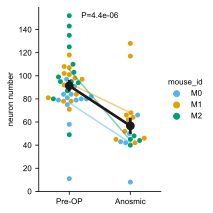

In [20]:
## Fig S9b
## Neuron numbers after triton treatment (anosmia induction)

df = load_source_data('S9',sheet_name='neuron_number_anosmic')


fig, ax = plt.subplots(figsize=[3,3])
sns.swarmplot(data=df,x='anosmic',y='neuron number',hue='mouse_id',palette=my_color_map,ax=ax,zorder=-100)
sns.move_legend(ax,loc='center left',bbox_to_anchor=(1,0.5),frameon=False)
for idx, mouse_id in enumerate(df['mouse_id'].unique()):
    y0 = df[(df['mouse_id']==mouse_id)&(df['anosmic']=='Pre-OP')]['neuron number'].mean()
    y1 = df[(df['mouse_id']==mouse_id)&(df['anosmic']=='Anosmic')]['neuron number'].mean()
    ax.plot([0,1],[y0,y1],color=my_color_map[idx],alpha=0.5,lw=1.5,zorder=-50)

sns.pointplot(data=df,x='anosmic',y='neuron number',color='k',errorbar='se')

ax.set_xlim([-0.5,1.5])
ax.set_ylim(ymin=0)
sns.despine()
plt.xlabel('')
plt.tight_layout()

t,p = stats.ttest_ind(df[df['anosmic']=='Pre-OP']['neuron number'],df[df['anosmic']=='Anosmic']['neuron number'])
# f,p = stats.f_oneway(df[df['anosmic']=='Pre-OP']['neuron number'],df[df['anosmic']=='Anosmic']['neuron number'])

print(t,p)

ax.text(0.5,150,s=f'P={p:.2g}',ha='center')


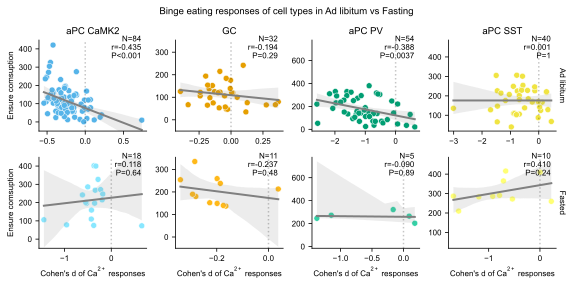

In [21]:
## Fig 5j + S9c
## Ad libitum vs Fasted correlation

df = load_source_data('4','cohensd_all_mice')

import scipy as sp
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['cohens_d'], data['milk_consumption'])
    n = len(data)
    ax = plt.gca()
    ax.axvline(x=0,ls=":",c='k',alpha=0.25)
    sns.regplot(data=data,x='cohens_d',y='milk_consumption',ax=ax,scatter=False,color='grey',line_kws={"linewidth":2})
    if p < 0.001:
        ax.text(.95, .8, f'N={n}\nr={r:.3f}\nP<0.001',ha='right',
                transform=ax.transAxes)
    else:
        ax.text(.95, .8, f'N={n}\nr={r:.3f}\nP={p:.2g}',transform=ax.transAxes,ha='right')
    ylims = ax.get_ylim()
    if ylims[0]<-50:
        ax.set_ylim(ymin=-50) # to prevent large negative scale

data = df
data = data[data['feeding_type']=='binge']
data = data[data['anosmic']==False]
cell_list  = ['apc_camk2','gc','apc_pv','apc_sst']
title_list = ['aPC CaMK2','GC','aPC PV','aPC SST']

## change boolean to str
fast_list = ['Ad libitum' if fast == False else 'Fasted' for fast in data['fasted']]
data['fasted'] = fast_list


g = sns.FacetGrid(data=data,col='Celltype',row='fasted',margin_titles=True,hue='Celltype', sharex=False, sharey='col',palette=my_color_map[:],height=2,aspect=1,
                  col_order=cell_list,
                  hue_order=cell_list)
g.map_dataframe(sns.scatterplot, x='cohens_d',y='milk_consumption')
global_xmin = data['cohens_d'].min()
g.map_dataframe(annotate)

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set_ylabels('Ensure comsuption')
g.set_xlabels(r"Cohen's d of $\mathregular{Ca^{2+}}$ responses")
for i, ax in enumerate(g.axes.flatten()):
    if i < 4:
        ax.set_title(title_list[i])
    for i, ax in enumerate(g.axes.flat):
        if i >3: # change the 2nd row to a lighter color 
            ax.collections[0].set_facecolor(my_color_map_grey_light[i-3])
            ax.collections[0].set_edgecolor('w')

g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Binge eating responses of cell types in Ad libitum vs Fasting')
plt.tight_layout()
